In [1]:
# Importing the libraries 

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

# Ignore harmless warnings 

import warnings 
warnings.filterwarnings("ignore")

# Set to display all the columns in dataset

pd.set_option("display.max_columns", None)

# Import psql to run queries 

import pandasql as psql

# import datetime class from datetime module

from datetime import datetime

In [2]:
# Import packages

import catboost
import sklearn

print("CatBoost Version     : ", catboost.__version__)
print("Scikit-Learn Version : ", sklearn.__version__)

CatBoost Version     :  1.0.6
Scikit-Learn Version :  1.1.1


In [3]:
pip install catboost

Note: you may need to restart the kernel to use updated packages.


In [9]:
# load the Breast Cancer dataset 

cancer = pd.read_csv(r"C:\Users\Admin\Downloads\Raju Sir DLS\Ensemble Learning\breast_cancer (1).csv", header=0)

# Copy file to back-up file

cancer_bk = cancer.copy()

# Display first 5 records

cancer.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,TumorType
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [10]:
# Display the information of dataset

cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [6]:
# Display the unique variables count

cancer.nunique()

id                         569
diagnosis                    2
radius_mean                456
texture_mean               479
perimeter_mean             522
area_mean                  539
smoothness_mean            474
compactness_mean           537
concavity_mean             537
concave points_mean        542
symmetry_mean              432
fractal_dimension_mean     499
radius_se                  540
texture_se                 519
perimeter_se               533
area_se                    528
smoothness_se              547
compactness_se             541
concavity_se               533
concave points_se          507
symmetry_se                498
fractal_dimension_se       545
radius_worst               457
texture_worst              511
perimeter_worst            514
area_worst                 544
smoothness_worst           411
compactness_worst          529
concavity_worst            539
concave points_worst       492
symmetry_worst             500
fractal_dimension_worst    535
Unnamed:

In [11]:
cancer["TumorType"].value_counts()

1    357
0    212
Name: TumorType, dtype: int64

In [12]:
# Identify the independent and Target (dependent) variables

IndepVar = []
for col in cancer.columns:
    if col != 'TumorType':
        IndepVar.append(col)

TargetVar = 'TumorType'

x = cancer[IndepVar]
y = cancer[TargetVar]

In [13]:
# Split the data into train and test (random sampling)

from sklearn.model_selection import train_test_split 

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, stratify=y, random_state=42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((455, 30), (114, 30), (455,), (114,))

In [14]:
# Scaling the features by using StandardScaler

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [15]:
# CatBoostClassifier is used for classification problems

from catboost import CatBoostClassifier
from catboost.utils import eval_metric

modelCBR = CatBoostClassifier(iterations=100, verbose=10)

modelCBR.fit(x_train, y_train, eval_set=(x_test, y_test))

modelCBR.set_feature_names(x_train)

Learning rate set to 0.071029
0:	learn: 0.5801820	test: 0.5747794	best: 0.5747794 (0)	total: 118ms	remaining: 11.7s
10:	learn: 0.1660032	test: 0.2030804	best: 0.2030804 (10)	total: 230ms	remaining: 1.86s
20:	learn: 0.0828487	test: 0.1386215	best: 0.1386215 (20)	total: 330ms	remaining: 1.24s
30:	learn: 0.0526731	test: 0.1200325	best: 0.1189775 (29)	total: 428ms	remaining: 953ms
40:	learn: 0.0370714	test: 0.1182467	best: 0.1177644 (38)	total: 546ms	remaining: 785ms
50:	learn: 0.0286816	test: 0.1141166	best: 0.1141166 (50)	total: 672ms	remaining: 645ms
60:	learn: 0.0225425	test: 0.1107863	best: 0.1107863 (60)	total: 786ms	remaining: 502ms
70:	learn: 0.0177481	test: 0.1056269	best: 0.1054479 (69)	total: 887ms	remaining: 362ms
80:	learn: 0.0147027	test: 0.1047682	best: 0.1033023 (75)	total: 985ms	remaining: 231ms
90:	learn: 0.0117716	test: 0.1025240	best: 0.1025240 (90)	total: 1.09s	remaining: 108ms
99:	learn: 0.0098029	test: 0.1015998	best: 0.1015998 (99)	total: 1.19s	remaining: 0us

bestT

Confusion matrix : 
 [[71  1]
 [ 4 38]]
Outcome values : 
 71 1 4 38
Classification report : 
               precision    recall  f1-score   support

           1       0.95      0.99      0.97        72
           0       0.97      0.90      0.94        42

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

Accuracy : 95.6 %
Precision : 94.7 %
Recall : 98.6 %
F1 Score : 0.966
Balanced Accuracy : 94.6 %
MCC : 0.906
roc_auc_score: 0.945


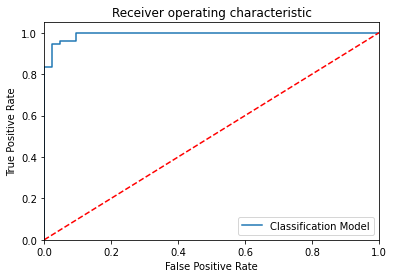

-----------------------------------------------------------------------------------------------------


In [16]:
# Predict the model with test data

y_pred = modelCBR.predict(x_test, prediction_type="Class")

from catboost.utils import eval_metric

# confusion matrix in sklearn

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# actual values

actual = y_test

# predicted values

predicted = y_pred

# confusion matrix

matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
print('Confusion matrix : \n', matrix)

# outcome values order in sklearn

tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy

matrix = classification_report(actual,predicted,labels=[1,0])

print('Classification report : \n',matrix)

# calculating the metrics

sensitivity = round(tp/(tp+fn), 3)
specificity = round(tn/(tn+fp), 3);
accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
balanced_accuracy = round((sensitivity+specificity)/2, 3);
    
precision = round(tp/(tp+fp), 3);
f1Score = round((2*tp/(2*tp + fp + fn)), 3);

# Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
# A model with a score of +1 is a perfect model and -1 is a poor model

from math import sqrt

mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

print('Accuracy :', round(accuracy*100, 2),'%')
print('Precision :', round(precision*100, 2),'%')
print('Recall :', round(sensitivity*100,2), '%')
print('F1 Score :', f1Score)
print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
print('MCC :', MCC)

# Area under ROC curve 

from sklearn.metrics import roc_curve, roc_auc_score

print('roc_auc_score:', round(roc_auc_score(y_test, y_pred), 3))

# ROC Curve

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test,modelCBR.predict_proba(x_test)[:,1])
plt.figure()
# plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot(fpr, tpr, label= 'Classification Model' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show() 
print('-----------------------------------------------------------------------------------------------------')

In [17]:
y_pred = modelCBR.predict(x_test, prediction_type="Probability")
y_pred = pd.DataFrame(y_pred)
y_pred.sample(10)

,0,1
33,0.040446,0.959554
16,0.388143,0.611857
5,0.007157,0.992843
66,0.400701,0.599299
29,0.002051,0.997949
76,0.963609,0.036391
71,0.003060,0.996940
92,0.999181,0.000819
62,0.001083,0.998917
24,0.002189,0.997811
